# Principe

Sur un tableau de $n$ éléments, le tri par insertion parcourt le tableau du deuxième au $n^{ieme}$ élément. Pour chacun de ces éléments, il l'insère dans la partie précédente du tableau de sorte à ce qu'elle reste triée. Pour ce faire, il déplace d'une case vers la droite tous les éléments strictement plus grands que l'élément à insérer, ce qui libère une position pour l'insertion.

Nous allons l'illustrer en triant le tableau TAB ci-dessous.

In [1]:
TAB = [ 5, 3, 8, 1, 4, 2, 7, 6 ]
print(TAB)

[5, 3, 8, 1, 4, 2, 7, 6]


# Boucle interne

Le coeur de l'algorithme consiste à insérer l'élément d'indice k dans le tableau supposé déjà trié des éléments d'indices 0 à k-1. Pour cela

* on copie l'élément k dans une variable temporaire tmp
* tant que tmp est plus petit que l'élément précédent, on déplace cet élément vers la droite et on recule d'une position dans le tableau
* quand on a atteint soit la première position du tableau, soit un élément plus grand ou égal à tmp, on s'arrête et on écrit tmp dans l'emplacement libéré.  

In [2]:
def inserer_un_element(T,k):
    tmp = T[k]
    
    i = k
    while i > 0 and tmp < T[i-1]: 
                         # tant que l'on a pas atteint le début
                         # du tableau et que l'élément précédent
                         # est plus grand que tmp
                    
        T[i] = T[i-1]    # déplacement de T[i-1] vers la droite
        i -= 1           # passage à l'indice précédent
    
    T[i] = tmp

Un tableau de 1 élément est toujours trié. On commence donc par insérer le deuxième élément (d'indice 1) dans le tableau ne contenant que le premier élément

In [3]:
T = TAB.copy()
inserer_un_element(T,1)
print(T[:2],T[2:])       # les deux premiers éléments sont triés, 
                         # le reste du tableau est intact

[3, 5] [8, 1, 4, 2, 7, 6]


Les deux premiers éléments sont maintenant triés. Insérons le troisième

In [4]:
inserer_un_element(T,2)
print(T[:3],T[3:])

[3, 5, 8] [1, 4, 2, 7, 6]


Puis le quatrième

In [5]:
inserer_un_element(T,3)
print(T[:4],T[4:])

[1, 3, 5, 8] [4, 2, 7, 6]


# Boucle externe 

On répète ce processus jusqu'à ce qu'on aie inséré tous les éléments

In [6]:
T = TAB.copy()
N = len(T)
print(T[:1],T[1:])

for i in range(1,N):
    inserer_un_element(T,i)
    print(T[:i+1],T[i+1:])
    # les éléments d'indices 0 à i sont triés, les suivants non

[5] [3, 8, 1, 4, 2, 7, 6]
[3, 5] [8, 1, 4, 2, 7, 6]
[3, 5, 8] [1, 4, 2, 7, 6]
[1, 3, 5, 8] [4, 2, 7, 6]
[1, 3, 4, 5, 8] [2, 7, 6]
[1, 2, 3, 4, 5, 8] [7, 6]
[1, 2, 3, 4, 5, 7, 8] [6]
[1, 2, 3, 4, 5, 6, 7, 8] []


# En résumé

Le tri par insertion effectue deux boucles imbiquées. La boucle interne insère l'élément d'indice k dans le sous-tableau le précédent. La boucle externe fait varier cet indice k de la deuxième à la dernière position. 

In [7]:
def tri_par_insertion(T):
    N = len(T)
    for k in range(1,N):
        tmp = T[k]
        
        i = k
        while i > 0 and tmp < T[i-1]:
            T[i] = T[i-1]
            i -= 1
        T[i] = tmp

In [8]:
T = TAB.copy()
print(T)
tri_par_insertion(T)
print(T)

[5, 3, 8, 1, 4, 2, 7, 6]
[1, 2, 3, 4, 5, 6, 7, 8]


# Complexité

Pour évaluer la complexité de cet algorithme, réécrivons le pour qu'il compte le nombre de comparaisons et d'écritures dans le tableau (il n'y a pas d'échanges dans ce tri). 

In [9]:
def tri_par_insertion_cnt(T):
    nb_comparaisons = nb_ecritures = 0
    N = len(T)
    for k in range(1,N):
        tmp = T[k]
        i = k
        nb_comparaisons += 1
        while i > 0 and tmp < T[i-1]:
            nb_comparaisons += 1
            T[i] = T[i-1]
            nb_ecritures += 1
            i -= 1
        T[i] = tmp
        nb_ecritures += 1
    return nb_comparaisons, nb_ecritures

Evaluons d'abord la complexité du tri d'un tableau au contenu généré aléatoirement.

In [10]:
import include.helpers as hlp  
hlp.evalue_complexite(tri_par_insertion_cnt, 
                      hlp.tableau_aleatoire, 
                      "tri par insertion")

<Figure size 640x480 with 1 Axes>

    N |     Comp. |      Ech.
-------------------------------
   10 |        23 |        23
   19 |       114 |       114
   37 |       376 |       376
   71 |      1431 |      1431
  138 |      4489 |      4489
  268 |     18361 |     18361
  517 |     66484 |     66484
 1000 |    255421 |    255421


Notons que 

* le nombre de comparaisons et d'écritures est égal 
* leur complexité est d'ordre quadratique en $\Theta(n^2)$ pour trier $n$ éléments. 
* mais le nombre exact de comparaisons varie, sans doute en fonction du contenu du tableau

Vérifions cette dernière hypothèse en triant un tableau déjà trié

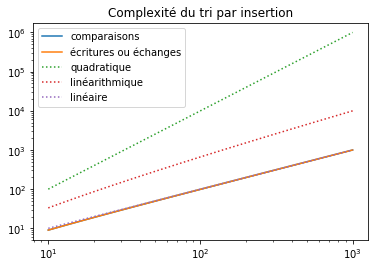

    N |     Comp. |      Ech.
-------------------------------
   10 |         9 |         9
   19 |        18 |        18
   37 |        36 |        36
   71 |        70 |        70
  138 |       137 |       137
  268 |       267 |       267
  517 |       516 |       516
 1000 |       999 |       999


In [11]:
hlp.evalue_complexite(tri_par_insertion_cnt, 
                      hlp.tableau_trie, 
                      "tri par insertion")

Dans ce cas, la complexité est linéaire en $\Theta(n)$. C'est logique, le test `tmp < T[i-1]` de la boucle interne renvoyant systématiquement `False`. Un tableau d'entrées triées est donc le meilleur cas pour le tri par insertion. 

Observons maintenant le cas inverse d'une entrée triée à l'envers

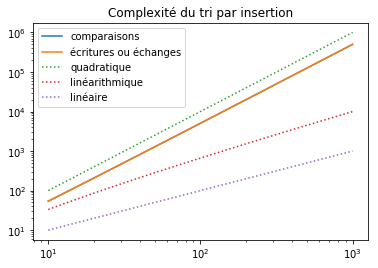

    N |     Comp. |      Ech.
-------------------------------
   10 |        54 |        54
   19 |       189 |       189
   37 |       702 |       702
   71 |      2555 |      2555
  138 |      9590 |      9590
  268 |     36045 |     36045
  517 |    133902 |    133902
 1000 |    500499 |    500499


In [12]:
hlp.evalue_complexite(tri_par_insertion_cnt, 
                      hlp.tableau_trie_inverse, 
                      "tri par insertion")

La complexité est ici quadratique en $\Theta(n^2)$. C'est le pire cas. 

Regardons maintenant un cas d'importance pratique, celui d'un tableau *presque trié*. Ecrivons d'abord une fonction générant un tel tableau.

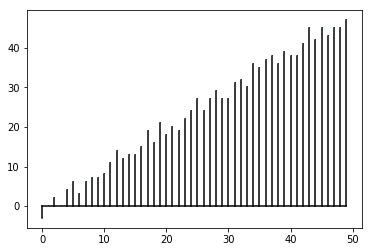

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def tableau_presque_trie(n):
    return [ i + np.random.randint(-3,3) for i in range(0,n) ]
    
plt.stem(tableau_presque_trie(50),markerfmt=',',linefmt='black',basefmt='black')
plt.show()

Utilisons cette fonction pour évaluer une dernière fois la complexité du tri par insertion

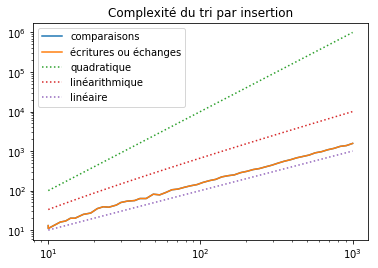

    N |     Comp. |      Ech.
-------------------------------
   10 |        13 |        13
   19 |        27 |        27
   37 |        56 |        56
   71 |       109 |       109
  138 |       222 |       222
  268 |       399 |       399
  517 |       790 |       790
 1000 |      1559 |      1559


In [14]:
hlp.evalue_complexite(tri_par_insertion_cnt, 
                      tableau_presque_trie, 
                      "tri par insertion")

La complexité est ici approximativement linéaire en $\Theta(n)$. C'est logique puisque la fonction de génération de tableau presque trié utilisée ci-dessus garanti qu'aucun élément n'est à plus de 5 places de sa position finale. 

Le tri par insertion est donc remarquablement efficace pour trier un tableau *presque* trié. A quel point il est efficace en pratique dépend évidemment de ce que l'on entend par *presque*

# Stabilité

Le tri par insertion est stable. En effet, le test `tmp < T[i-1]` garantit qu'on ne déplace pas vers la droite un élément égal à celui que l'on cherche à insérer. L'ordre des éléments égaux est donc préservé. 

Pour l'illuster, il faut réécrire le tri avec une fonction de comparaison générique. 


Le tri est stable


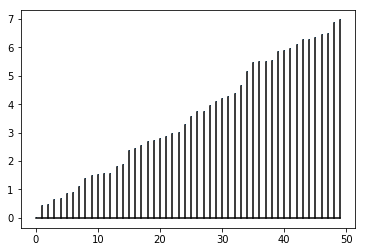

In [15]:
def tri_par_insertion_generique(T,plus_petit):
    N = len(T)
    for k in range(1,N):
        tmp = T[k]
        
        i = k
        while i > 0 and plus_petit(tmp,T[i-1]):
            T[i] = T[i-1]
            i -= 1
        T[i] = tmp
        
hlp.test_stabilite(tri_par_insertion_generique)

Notons que le test strict `tmp < T[i-1]` est essentiel à la stabilité du tri. Si l'on le remplace par erreur par le test `tmp <= T[i-1]`, ou  `not( T[i-1] < tmp )`, le tri devient instable


Le tri n'est pas stable


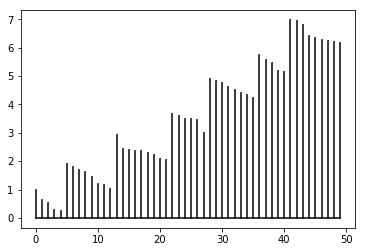

In [16]:
def tri_par_insertion_errone(T,plus_petit):
    N = len(T)
    for k in range(1,N):
        tmp = T[k]
        
        i = k
        while i > 0 and not plus_petit(T[i-1],tmp):
            T[i] = T[i-1]
            i -= 1
        T[i] = tmp
        
hlp.test_stabilite(tri_par_insertion_errone)

# Visualisation

Finalement, visualisons graphiquement une itération sur 7 du tri de 50 entiers aléatoires entre 0 et 100

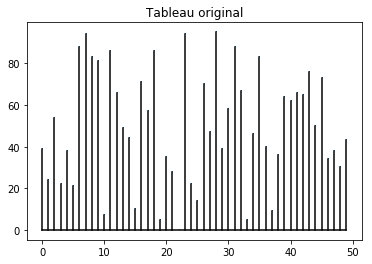

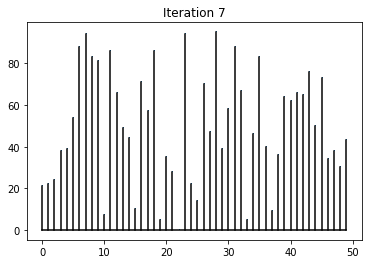

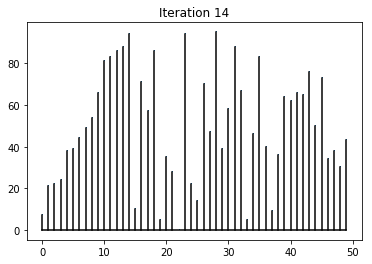

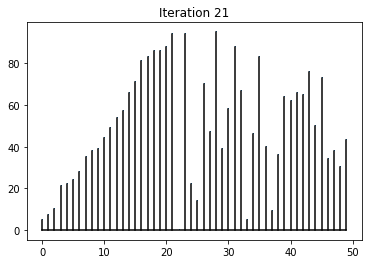

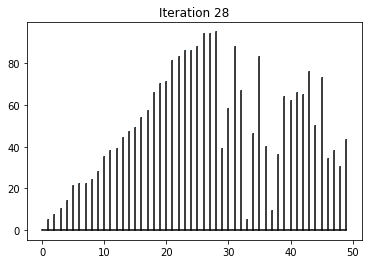

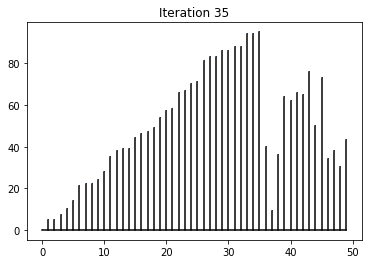

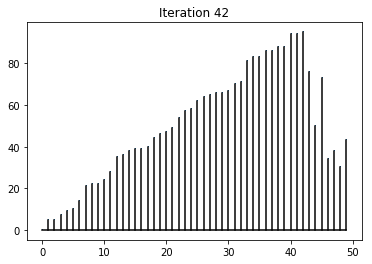

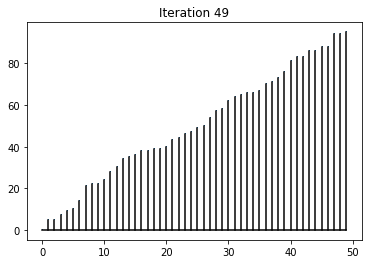

In [17]:
hlp.visualisation_tri_par_insertion()